In [1]:
!pip install tweepy
import tweepy as tw
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
import nltk
from nltk import bigrams
from nltk.corpus import stopwords
import re
import networkx as nx
import warnings
warnings.filterwarnings("ignore")
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
import warnings
!pip install textblob
from textblob import TextBlob
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\EN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
#file='C:/Users/EN/DataScienceAcademy/Project4/covid_tweet.xlxs'
df=pd.read_excel('covid_tweet.xlsx', index_col=0) 

In [3]:
df.head()

,Tweets,User,User_statuses_count,user_followers,User_location,User_verified,fav_count,rt_count,tweet_date
0,RT @ClinRheumatol: NEW review article: Managin...,Armen Yuri Gasparyan,7820,1589,"West Midlands, England",False,0,19,2020-09-21 20:18:30
1,The @WHO + many other countries posted the ris...,Denise Henwood,108564,8041,abz yyc las,False,0,0,2020-09-21 20:18:29
2,RT @DrEricDing: OH CHRIST—Trump HHS just did f...,Sophie Connell,3368,416,"Baltimore, MD",False,0,16932,2020-09-21 20:18:29
3,RT @DrEricDing: 🚨HOLY HELL—CDC has now taken d...,Lady Di,93431,4242,NaN,False,0,1792,2020-09-21 20:18:28
4,@Independent Too bad a sitting president can’t...,janne pettersson,5422,98,"Saint Gallen, Switzerland",False,1,0,2020-09-21 20:18:27


In [5]:
df.tail()

,Tweets,User,User_statuses_count,user_followers,User_location,User_verified,fav_count,rt_count,tweet_date
49995,"RT @BloodDonorsIn: #Bhopal, Madhya Pradesh\nNe...",chaitanya sagar,1900,21,NaN,False,0,44,2020-09-21 15:48:43
49996,#COVID19 has decimated hotel businesses and 6 ...,Proud Guju American,3,0,NaN,False,0,0,2020-09-21 15:48:43
49997,RT @Ivy_MiddletonUK: Look at this poor lab mon...,Harry Nisar,41665,674,Jakarta Capital Region,False,0,381,2020-09-21 15:48:42
49998,RT @BloodDonorsIn: #Delhi\nNeed #Blood Type : ...,#indian2 #RRR,66578,846,NaN,False,0,39,2020-09-21 15:48:41
49999,"RT @WHO: ""We’re encouraged to see a large numb...",twilight2000,237948,1691,Left Coast of the US,False,0,18,2020-09-21 15:48:41


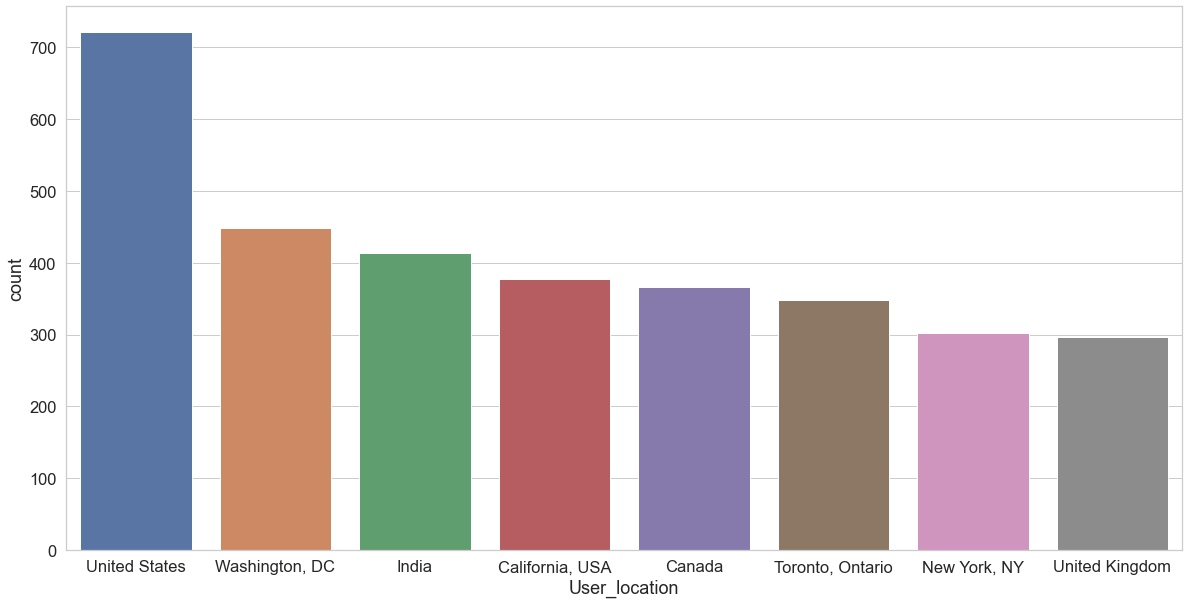

In [14]:
plt.figure(figsize=(20,10))
sns.countplot(x='User_location', data=df, order=df.User_location.value_counts().iloc[:8].index)

In [15]:
a=df["Tweets"].values.tolist()

In [16]:
a[:5]

['RT @ClinRheumatol: NEW review article: Managing rheumatic diseases during #COVID19\n👉https://t.co/vIqHjdl9bQ https://t.co/P5W26bEawO',
 'The @WHO + many other countries posted the risk of #covid19 #airborne #aerosol transmission long ago.… https://t.co/aCgiSPMQFq',
 'RT @DrEricDing: OH CHRIST—Trump HHS just did full “power grab” takeover of all drug/vaccines. Via “stunning declaration” of authority, HHS…',
 'RT @DrEricDing: 🚨HOLY HELL—CDC has now taken down the “coronavirus is aerosol &amp; airborne” guidance from yesterday!!!! It’s like gone!! Inst…',
 '@Independent Too bad a sitting president can’t be charged with manslaughter or gross negligence......😷 #TrumpLied200KDied    #COVID19']

In [17]:
def clean_tweet(tweet):
    return ' '.join(re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)', ' ', tweet).split())

In [18]:
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity ==0:
        return 'Neutral'
    else:
        return 'Negative'

In [19]:
df['clean_tweet'] = df['Tweets'].apply(lambda x: clean_tweet(x))
df['Sentiment'] = df['clean_tweet'].apply(lambda x: analyze_sentiment(x))

In [13]:
#n=200
#print('Original tweet:\n'+ df['Tweets'][n])
#print()
#print('Clean tweet:\n'+df['clean_tweet'][n])
#print()
#print('Sentiment:\n'+df['Sentiment'][n])

Original tweet:
No need #COVID19 was the result of all three! Stay focus &amp; keep your eyes on the price! #PlanYourVote &amp;… https://t.co/hKkfyDkOr1

Clean tweet:
No need COVID19 was the result of all three Stay focus amp keep your eyes on the price PlanYourVote amp

Sentiment:
Neutral


In [20]:
!pip install wordcloud
!pip install chart-studio
!pip install cufflinks
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl', offline=True)

In [21]:
df['Sentiment'].value_counts().iplot(kind='bar', xTitle='Sentiment',
                                    yTitle='Count', title='Overall Sentiment Distribution')

In [22]:
df_popular = df[df['rt_count'] >= 100]
df_popular['Sentiment'].value_counts().iplot(kind='bar', xTitle='Sentiment',
                                    yTitle='Count', title = 'Sentiment Distribution for <br> popular tweets (Above 100)')

In [22]:
df.iplot(x='User_statuses_count', y = 'user_followers', mode='markers'
        , categories='User_verified',layout=dict(
        xaxis=dict(type='log', title='No. of Statuses'),
        yaxis=dict(type='log', title='No. of followers'),
        title='No. of statuses vs. No. of followers'))

In [37]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [38]:
a_no_urls = [remove_url(tweet) for tweet in a]
a_no_urls[:5]

['RT ClinRheumatol NEW review article Managing rheumatic diseases during COVID19',
 'The WHO many other countries posted the risk of covid19 airborne aerosol transmission long ago',
 'RT DrEricDing OH CHRISTTrump HHS just did full power grab takeover of all drugvaccines Via stunning declaration of authority HHS',
 'RT DrEricDing HOLY HELLCDC has now taken down the coronavirus is aerosol amp airborne guidance from yesterday Its like gone Inst',
 'Independent Too bad a sitting president cant be charged with manslaughter or gross negligence TrumpLied200KDied COVID19']

In [39]:
a_no_urls[0].lower().split()

['rt',
 'clinrheumatol',
 'new',
 'review',
 'article',
 'managing',
 'rheumatic',
 'diseases',
 'during',
 'covid19']

In [40]:
words_in_tweet = [tweet.lower().split() for tweet in a_no_urls]
words_in_tweet[:2]

[['rt',
  'clinrheumatol',
  'new',
  'review',
  'article',
  'managing',
  'rheumatic',
  'diseases',
  'during',
  'covid19'],
 ['the',
  'who',
  'many',
  'other',
  'countries',
  'posted',
  'the',
  'risk',
  'of',
  'covid19',
  'airborne',
  'aerosol',
  'transmission',
  'long',
  'ago']]

In [41]:
all_words_no_urls = list(itertools.chain(*words_in_tweet))

# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)

counts_no_urls.most_common(15)

[('rt', 39223),
 ('the', 33122),
 ('of', 26099),
 ('covid19', 25516),
 ('to', 19678),
 ('is', 15818),
 ('a', 13993),
 ('in', 13777),
 ('and', 12704),
 ('for', 9096),
 ('on', 7437),
 ('from', 7397),
 ('drericding', 6207),
 ('just', 5874),
 ('as', 5872)]

In [49]:
stop_words = set(stopwords.words('english'))

# View a few words from the set
list(stop_words)[0:10]

['ll',
 'which',
 "isn't",
 'him',
 "you'll",
 'below',
 'how',
 'where',
 'its',
 'few']

In [77]:
words_in_tweet[10]

['rt',
 'jnjinnovation',
 'in',
 '2020',
 'the',
 'lifescience',
 'community',
 'has',
 'come',
 'together',
 'to',
 'solve',
 'some',
 'of',
 'the',
 'biggest',
 'healthcare',
 'challenges',
 'of',
 'our',
 'time',
 'hea']

In [107]:
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]
tweets_nsw[10]

['rt',
 'jnjinnovation',
 '2020',
 'lifescience',
 'community',
 'come',
 'together',
 'solve',
 'biggest',
 'healthcare',
 'challenges',
 'time',
 'hea']

In [135]:
def find_at(text):
    line=re.findall(r'(?<=@)\w+',text)
    return " ".join(line)
df['mention']=df['Tweets'].apply(lambda x:find_at(x))

In [136]:
mentions=list(df[(df['mention'].notnull())&(df['mention']!="")]['mention'])
mentions = [each_string.lower().split() for each_string in mentions]
mentions=list(itertools.chain.from_iterable(mentions))
mention_df=dict(Counter(mentions))
top_mention_df=pd.DataFrame(list(mention_df.items()),columns = ['word','count']).sort_values('count',ascending=False)[:20]
top_mention_df.head(10)

,word,count
2,drericding,6207
16,cdcgov,3642
24,drleanawen,2856
651,blooddonorsin,909
84,laurie_garrett,787
230,julianzelizer,771
10,gavinnewsom,621
1,who,607
37,realdonaldtrump,504
139,drtedros,397


In [137]:
fig = go.Figure(go.Bar(
    x=top_mention_df['word'],y=top_mention_df['count'],
    marker={'color': top_mention_df['count'], 
    'colorscale': 'blues'},  
    text=top_mention_df['count'],
    textposition = "outside",
))
fig.update_layout(title_text='Top Trended Hastags',xaxis_title="Hashtags",
                  yaxis_title="Number of Tags",template="plotly_dark",height=700,title_x=0.5)
fig.show()

In [138]:
def remove_tag(string):
    text=re.sub('<.*?>','',string)
    return text
def remove_mention(text):
    line=re.sub(r'@\w+','',text)
    return line
def remove_hash(text):
    line=re.sub(r'#\w+','',text)
    return line

def remove_newline(string):
    text=re.sub('\n','',string)
    return text
def remove_url(string): 
    text = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','',string)
    return text
def remove_number(text):
    line=re.sub(r'[0-9]+','',text)
    return line
def remove_punct(text):
    line = re.sub(r'[!"\$%&\'()*+,\-.\/:;=#@?\[\\\]^_`{|}~]*','',text)
    #string="".join(line)
    return line
def text_strip(string):
    line=re.sub('\s{2,}', ' ', string.strip())
    return line
def remove_thi_amp_ha_words(string):
    line=re.sub(r'\bamp\b|\bthi\b|\bha\b',' ',string)
    return line

In [140]:
df['refine_text']=df['Tweets'].str.lower()
df['refine_text']=df['refine_text'].apply(lambda x:remove_tag(str(x)))
df['refine_text']=df['refine_text'].apply(lambda x:remove_mention(str(x)))
df['refine_text']=df['refine_text'].apply(lambda x:remove_hash(str(x)))
df['refine_text']=df['refine_text'].apply(lambda x:remove_newline(x))
df['refine_text']=df['refine_text'].apply(lambda x:remove_url(x))
df['refine_text']=df['refine_text'].apply(lambda x:remove_number(x))
df['refine_text']=df['refine_text'].apply(lambda x:remove_punct(x))
df['refine_text']=df['refine_text'].apply(lambda x:remove_thi_amp_ha_words(x))
df['refine_text']=df['refine_text'].apply(lambda x:text_strip(x))

df['text_length']=df['refine_text'].str.split().map(lambda x: len(x))

In [141]:
fig = go.Figure(data=go.Violin(y=df['text_length'], box_visible=True, line_color='black',
                               meanline_visible=True, fillcolor='royalblue', opacity=0.6,
                               x0='Tweet Text Length'))

fig.update_layout(yaxis_zeroline=False,title="Distribution of Text length",template='ggplot2')
fig.show()

Text(0.5, 1.0, 'Most Used Words in Comments')

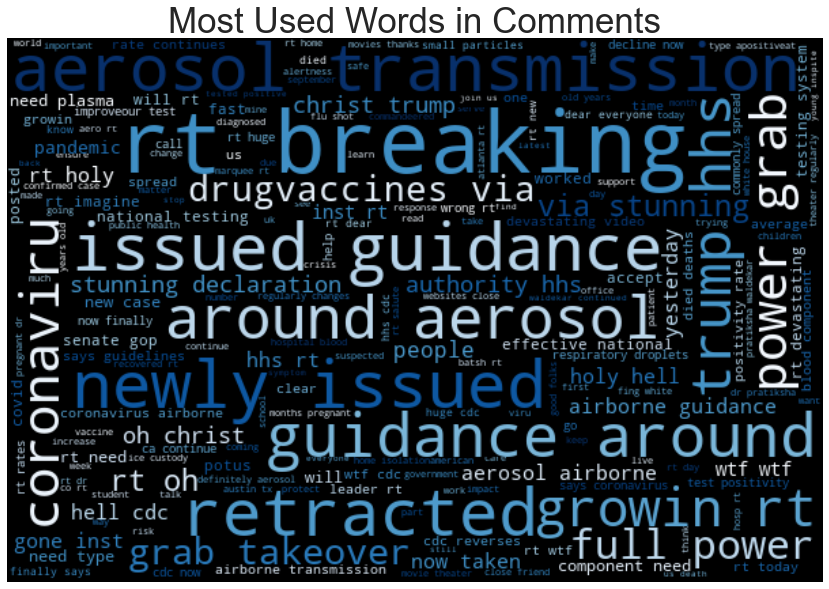

In [142]:
fig, (ax2) = plt.subplots(1,1,figsize=[17, 10])
wordcloud2 = WordCloud(background_color='black',colormap="Blues", 
                        width=600,height=400).generate(" ".join(df['refine_text']))

ax2.imshow(wordcloud2,interpolation='bilinear')
ax2.axis('off')
ax2.set_title('Most Used Words in Comments',fontsize=35)


In [144]:
from sklearn.feature_extraction.text import CountVectorizer
def ngram_df(corpus,nrange,n=None):
    vec = CountVectorizer(stop_words = 'english',ngram_range=nrange).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    total_list=words_freq[:n]
    df=pd.DataFrame(total_list,columns=['text','count'])
    return df
unigram_df=ngram_df(df['refine_text'],(1,1),20)
bigram_df=ngram_df(df['refine_text'],(2,2),20)
trigram_df=ngram_df(df['refine_text'],(3,3),20)

In [147]:
from plotly.subplots import make_subplots
fig = make_subplots(
    rows=3, cols=1,subplot_titles=("Unigram","Bigram",'Trigram'),
    specs=[[{"type": "scatter"}],
           [{"type": "scatter"}],
           [{"type": "scatter"}]
          ])

fig.add_trace(go.Bar(
    y=unigram_df['text'][::-1],
    x=unigram_df['count'][::-1],
    marker={'color': "blue"},  
    text=unigram_df['count'],
    textposition = "outside",
    orientation="h",
    name="Months",
),row=1,col=1)

fig.add_trace(go.Bar(
    y=bigram_df['text'][::-1],
    x=bigram_df['count'][::-1],
    marker={'color': "blue"},  
    text=bigram_df['count'],
     name="Days",
    textposition = "outside",
    orientation="h",
),row=2,col=1)

fig.add_trace(go.Bar(
    y=trigram_df['text'][::-1],
    x=trigram_df['count'][::-1],
    marker={'color': "blue"},  
    text=trigram_df['count'],
     name="Days",
    orientation="h",
    textposition = "outside",
),row=3,col=1)

fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(title_text='Top N Grams',xaxis_title=" ",yaxis_title=" ",
                  showlegend=False,title_x=0.5,height=1200,template="plotly_dark")
fig.show()